In [11]:
import sys
sys.path.insert(0, "../autowrite")

In [12]:
from Iamondb import Iamondb
from Visualizer import Visualizer

In [3]:
iamondb = Iamondb("./../../data/raw_data")

In [4]:
touch_points, labels = iamondb.get_samples()

In [5]:
print(len(touch_points), len(labels))

64 64


In [6]:
i = 30
example_touch_points = touch_points[i]
example_text = labels[i]

In [7]:
visualizer = Visualizer()

May I suggest that you have


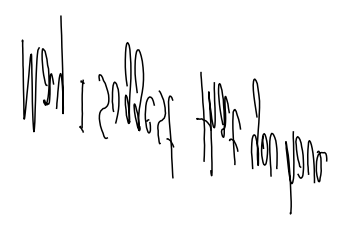

In [8]:
visualizer.plot_raw_sample(example_touch_points)
print(example_text)

In [9]:
from Preprocessor import Preprocessor

2022-06-24 10:12:13.321126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-24 10:12:13.321148: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
preprocessor = Preprocessor("../autowrite/model_data/alphabet")

In [11]:
%matplotlib qt

normalized = preprocessor.normalize_strokes(example_touch_points)
visualizer.plot_raw_sample(normalized)
print(preprocessor.decode_sample(preprocessor.encode_sample(example_text)))

['M', 'a', 'y', ' ', 'I', ' ', 's', 'u', 'g', 'g', 'e', 's', 't', ' ', 't', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e']


In [14]:
fitted_bezier_curves = preprocessor.strokes_to_bezier(example_touch_points)
visualizer.plot_bezier_curves(fitted_bezier_curves, control_points=True)

In [13]:
import sys

bezier_features = []

for i, sample in enumerate(touch_points):
    sys.stdout.write(f"\r{(float(i)/len(touch_points)*100):.2f}%")
    bezier_features.append(preprocessor.strokes_to_bezier(sample))

padded_bezier_features = preprocessor.pad_data(bezier_features, value=0, width=11)

34.38%

KeyboardInterrupt: 

In [ ]:
visualizer.plot_bezier_curves(padded_bezier_features[1000])

In [ ]:
import numpy as np
np.save("../../data/processed_data/bezier_features_padded_improved", padded_bezier_features)

In [ ]:
target = []

for i, sample in enumerate(labels):
    sys.stdout.write(f"\r{(float(i)/len(touch_points)*100):.2f}%")
    target.append(preprocessor.encode_sample(sample))

padded_target = preprocessor.pad_data(target, value=82)

In [ ]:
np.save("../../data/processed_data/target_padded", padded_target)

In [ ]:
from Encoder import Encoder

In [ ]:
import numpy as np

target = np.load("../../data/processed_data/target_padded.npy")
features = np.load("../../data/processed_data/bezier_features_padded_improved.npy")

In [17]:
from PersonalData import PersonalData

p = PersonalData("../../data/raw_data/personal_data_set")
(s, l) = p.get_samples()

In [26]:
import sys

bezier_features = []

for i, sample in enumerate(s):
    sys.stdout.write(f"\r{(float(i)/len(s)*100):.2f}%")
    bezier_features.append(preprocessor.strokes_to_bezier(sample))

padded_bezier_features = preprocessor.pad_data(bezier_features, value=0, width=11)

99.01%

In [27]:
target = []

for i, sample in enumerate(l):
    sys.stdout.write(f"\r{(float(i)/len(l)*100):.2f}%")
    target.append(preprocessor.encode_sample(sample))

padded_target = preprocessor.pad_data(target, value=82)

99.01%

['L', 'i', 't', 't', 'l', 'e', ' ', 's', 'c', 'i', 'e', 'n', 't', 'i', 'f', 'i', 'c', ' ', '2', '0', '1', '6', ',', ' ', 'N', 'a', 'v', 'y', ' ', 'P', 'i', 'e', 'r']


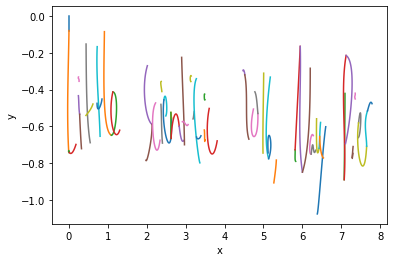

In [32]:
print(preprocessor.decode_sample(padded_target[0][padded_target[0] < 82]))
visualizer.plot_bezier_curves(padded_bezier_features[0])

In [35]:
print(features.shape)
print(target.shape)

(11983, 201, 11)
(11983, 64)


In [47]:
tb = np.append(padded_bezier_features, np.zeros((101, 46, 11)), axis=1)

In [49]:
tt = np.append(padded_target, np.full((101, 14), 82), axis=1)

In [53]:
personal_f = np.append(features, tb, axis=0)
personal_t = np.append(target, tt, axis=0)

['T', 'h', 'e', ' ', 'r', 'u', 's', 't', 'i', 'c', ' ', 'c', 'l', 'e', 'r', 'i', 'c', ' ', 'd', 'r', 'a', 'g', 's', ' ', 'f', 'o', 'r', 't', 'u', 'n', 'e', '.']


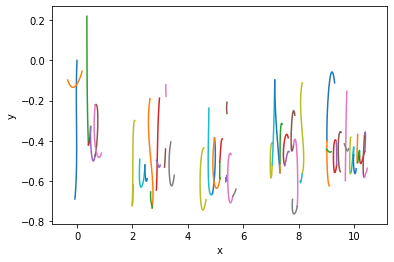

In [57]:
sample = 12000
print(preprocessor.decode_sample(personal_t[sample][personal_t[sample] < 82]))
visualizer.plot_bezier_curves(personal_f[sample])

In [58]:
np.save("../../data/processed_data/bezier_features_personal_padded", personal_f)
np.save("../../data/processed_data/target_personal_padded", personal_t)